In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt

import aptwrapper

# Sample B (for AFM)

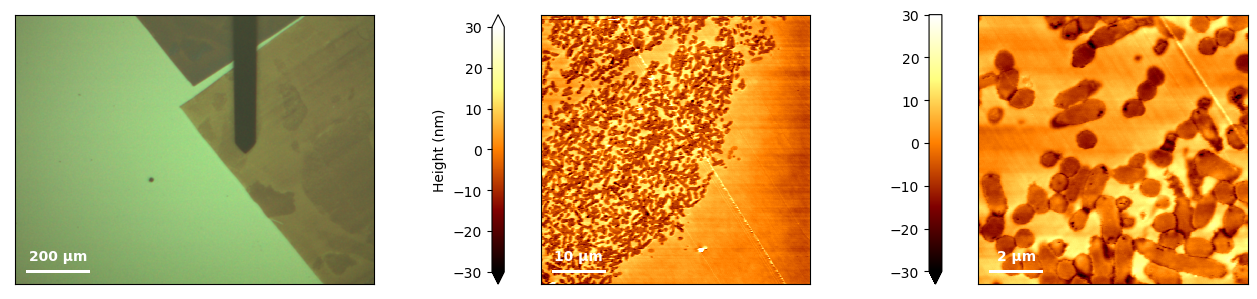

In [3]:
doc = aptwrapper.read('doc2_sampleB.axz')
fig, ax = plt.subplots(1,3, figsize=(16,3.5))

aptwrapper.plot_map(doc.Images['Video 2'], ax[0])
aptwrapper.plot_map(doc.HeightMaps['Height 1'], ax[1], vmax=30)
aptwrapper.plot_map(doc.HeightMaps['Height 3'], ax[2], cb_label='', vmax=30)

# Sample A (for SEM)

## Heightmaps

In [4]:
aptwrapper.plot_map(doc1.Images['Video 5'], contrast=(.5,5))

doc_spectra = aptwrapper.read('doc4_sampleA_IRspectra.axz')
aptwrapper.mark_location(doc_spectra.RenderedSpectra['Spectrum 10'])


NameError: name 'doc1' is not defined

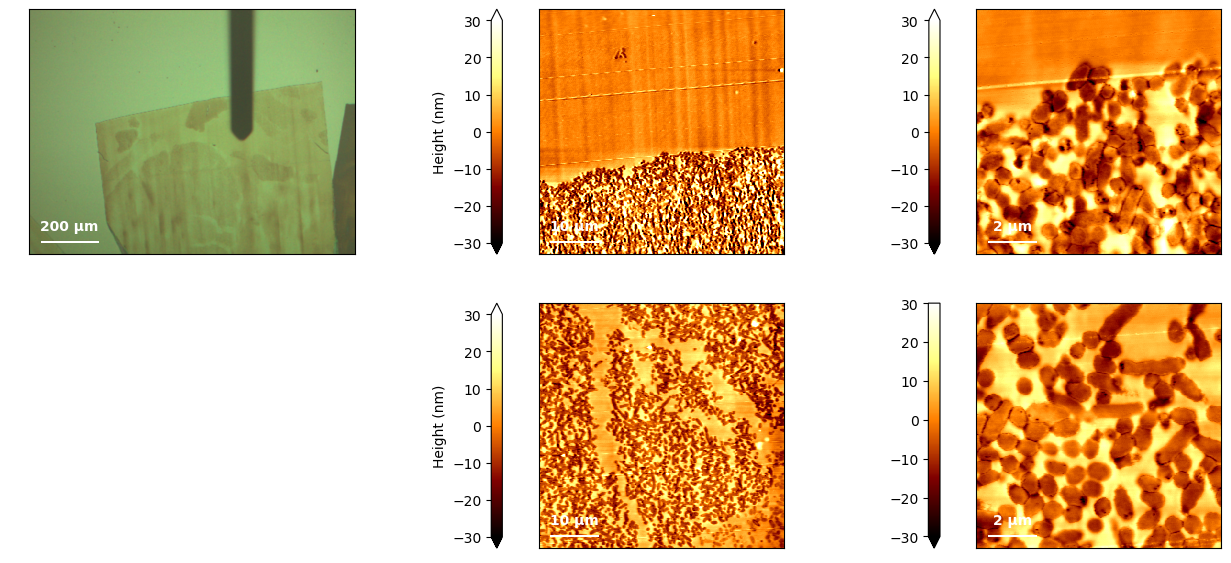

In [5]:
doc1 = aptwrapper.read('doc1_sampleA.axz')
fig, ax = plt.subplots(2,3, figsize=(16,7))

aptwrapper.plot_map(doc1.Images['Video 5'], ax[0,0])
ax[1,0].axis('off')

aptwrapper.plot_map(doc1.HeightMaps['Height 1'], ax[0,1], vmax=30)
aptwrapper.plot_map(doc1.HeightMaps['Height 2'], ax[0,2], vmax=30, cb_label='')
aptwrapper.plot_map(doc1.HeightMaps['Height 3'], ax[1,1], vmax=30)
aptwrapper.plot_map(doc1.HeightMaps['Height 4'], ax[1,2], vmax=30, cb_label='')

## IR Maps

In [14]:
doc_spectra = aptwrapper.read('doc4_sampleA_IRspectra.axz')
doc_maps = aptwrapper.read('doc3_sampleA_IR.axz')

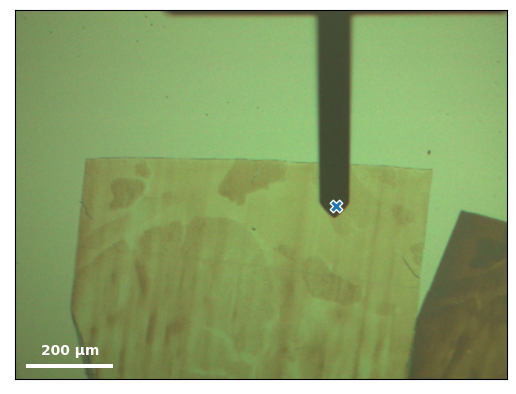

In [15]:
aptwrapper.plot_map(doc_maps.Images['Video 1'])
aptwrapper.mark_location(doc_spectra.RenderedSpectra['Spectrum 10'])

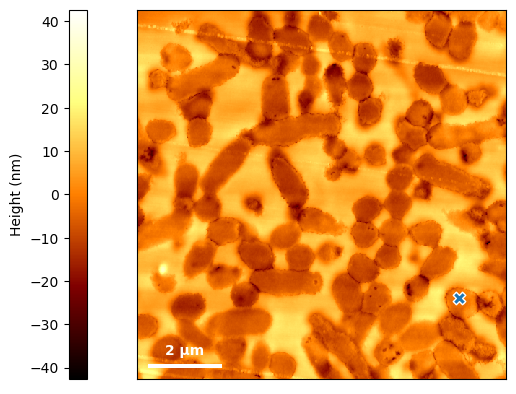

In [18]:
aptwrapper.plot_map(doc_maps.HeightMaps['Height 3'])
aptwrapper.mark_location(doc_spectra.RenderedSpectra['Spectrum 10'])

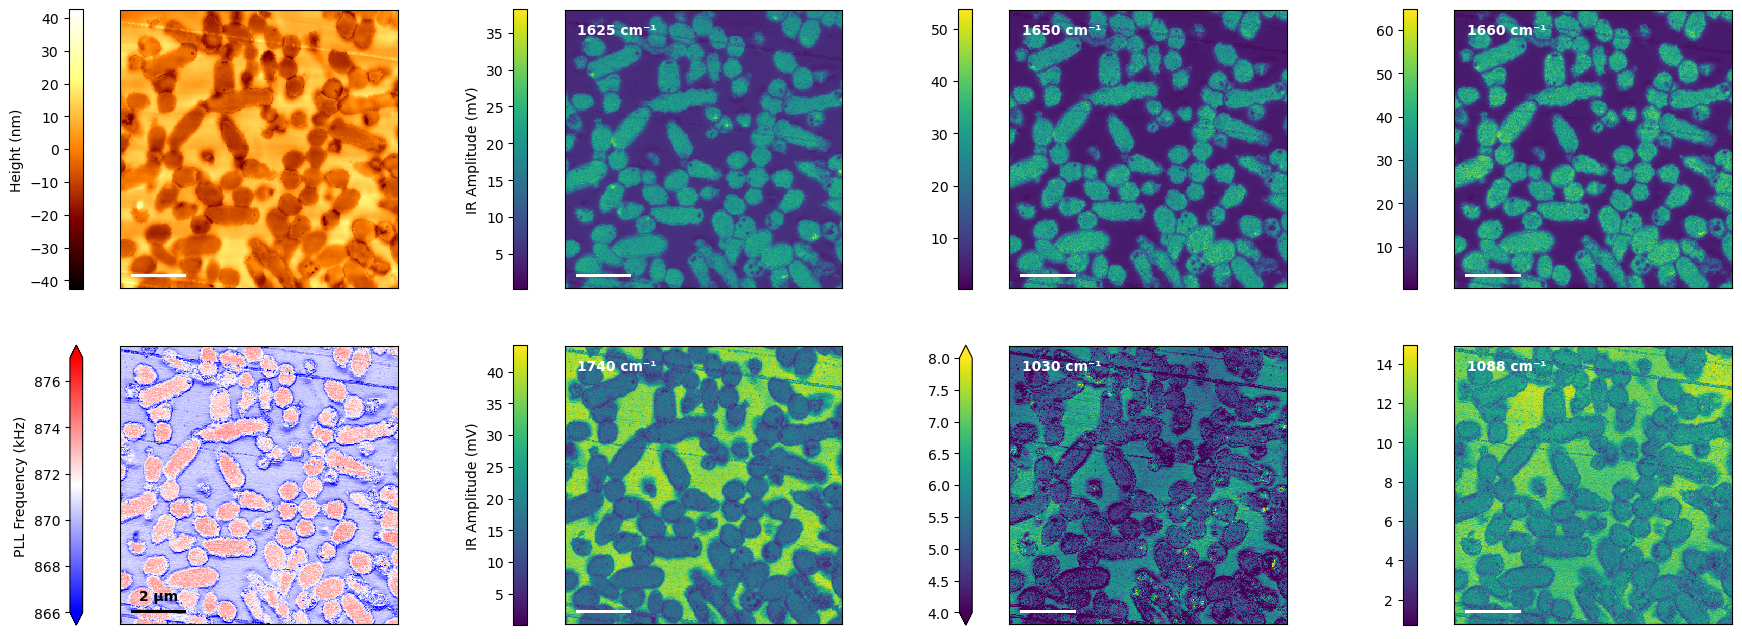

In [22]:
doc_maps = aptwrapper.read('doc3_sampleA_IR.axz')
fig, ax = plt.subplots(2, 4, figsize=(22,8))

aptwrapper.plot_map(doc_maps.HeightMaps['Height 3'],        ax[0,0], show_sb_val=False)
aptwrapper.plot_map(doc_maps.HeightMaps['PLL Frequency 5'], ax[1,0], show_sb_val=True, vmin=866, vmax=877)
aptwrapper.plot_map(doc_maps.HeightMaps['IR Amplitude 3'],  ax[0,1], show_sb_val=False)
aptwrapper.plot_map(doc_maps.HeightMaps['IR Amplitude 7'],  ax[0,2], show_sb_val=False, cb_label='')
aptwrapper.plot_map(doc_maps.HeightMaps['IR Amplitude 5'],  ax[0,3], show_sb_val=False, cb_label='')
aptwrapper.plot_map(doc_maps.HeightMaps['IR Amplitude 6'],  ax[1,1], show_sb_val=False)
aptwrapper.plot_map(doc_maps.HeightMaps['IR Amplitude 4'],  ax[1,2], show_sb_val=False, cb_label='', vmax=8, vmin=4)
aptwrapper.plot_map(doc_maps.HeightMaps['IR Amplitude 8'],  ax[1,3], show_sb_val=False, cb_label='')

## Spectra

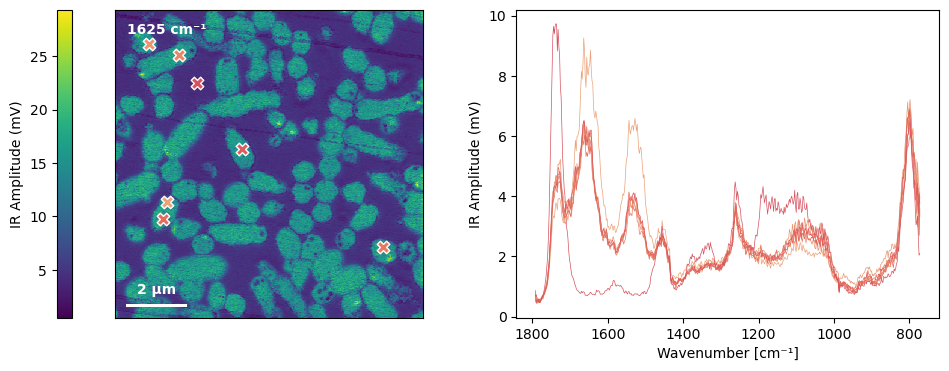

In [13]:
doc_spectra = aptwrapper.read('doc4_sampleA_IRspectra.axz')
fig, ax = plt.subplots(1,2,figsize=(12,4))

spectra = xr.concat(doc_spectra.RenderedSpectra.values(), dim='si')['IR Amplitude (mV)']
bgmask = spectra.sel(v=slice(1500,1600)).mean('v') < 2
bg = spectra[bgmask].mean('si')

aptwrapper.plot_map(doc_spectra.HeightMaps['IR Amplitude 1'], ax[0])
colors = sns.color_palette('flare', n_colors=len(spectra))
for i, s in enumerate(spectra[6:13]):
    aptwrapper.plot_spectrum(s, ax[1], ax[0], color=colors[i], lw=.5)

(1700.0, 1400.0)

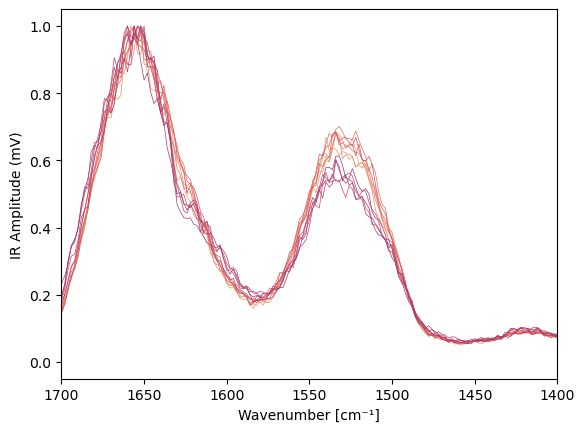

In [104]:
norm = lambda x: (x-x.min())/(x.max()-x.min())

for i, s in enumerate(spectra):
    if bgmask[i].item(): continue
    aptwrapper.plot_spectrum(norm(s/bg), color=colors[i], lw=.5)

plt.xlim(1700,1400)

## Backgrounds

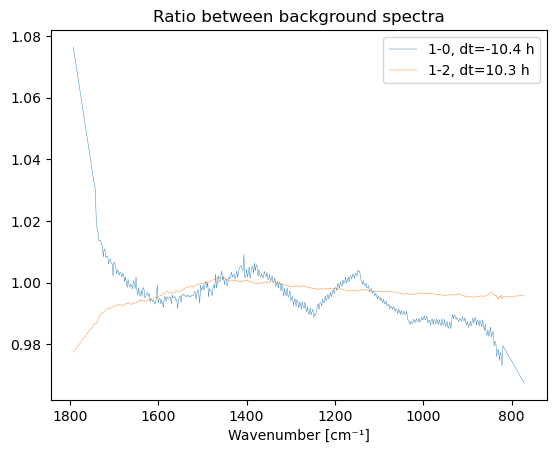

In [123]:
fnt = lambda d, h, m: pd.to_datetime(f'2023-02-{d} {h}:{m}')

bgs = xr.concat([aptwrapper.read(f'bg{i}.irb') for i in [1,2,3]], 'i').assign_coords(
    t=('i', [fnt(8, 13,19), fnt(8, 23,42), fnt(9, 10,3)]))

i1 = 1
for i2 in [0,2]:
    aptwrapper.savgol(bgs[i2]/bgs[i1], 50, 1).plot(lw=.3, label=f'{i1}-{i2}, dt={(bgs[i2].t-bgs[i1].t).item()*1e-9/60**2:.1f} h')

plt.legend()
plt.title('Ratio between background spectra')
plt.gca().invert_xaxis()
